# Раздел 5. Уравнения с частными производными гиперболического типа.
## Лабораторная рабода №5. Методы решения уравнения переноса. 
### Вариант 3, задание 9.
_Яромир Водзяновский_

## Аналитическое решение 
Дифференциальная задача:
$$ \frac{\partial u}{\partial t} - 4\frac{\partial u}{\partial x} = x; \;\;\; 0 < t \leq 1,\; 0 \leq x \leq 1 $$
$$u(x,0) = \sin{x} - 0.125x^2; \;\; u(1,t) = \sin{(1+4t)} - 0.125$$

Аналитическое решение:
$$u(x,t) = \sin{(4t+x)} - \frac{x^2}{8}$$

## Численное решение
Разностная схема:
$$D_h = \left\{ (x_l,t^n): x_l = hl, hL = 1, l = \overline{0,L};\; t^n = n\tau, \tau N=1,n = \overline{0,N} \right \} $$

$$u_l^{n+1} = u_l^n + \frac{2\tau}{3h} \left( 2u_{l+3}^n - 9u_{l+2}^n + 18u_{l+1}^n - 11u_l^n \right) + \frac{8\tau^2}{h^2}  \left( -u_{l+3}^n +4u_{l+2}^n -5u_{l+1}^n +2u_l^n  \right) + \frac{32\tau^3}{3h^3} \left(u_{l+3}^n -3u_{l+2}^n +3u_{l+1}^n -u_l^n  \right) + \tau x_l + 2\tau^2, \;\;\;\;\;\;\;\; l = \overline{0,L-3}, n = \overline{0,N-1}$$

$$u_l^0 = \sin{x_l} - 0.125x_l^2 = \varphi_l, \; l = \overline{0,L}; \;\; u_L^n = \sin{(1+4t^n)} -0.125 = \psi^n,\;n=\overline{1,N}  $$

$$u_{L-1}^n = ?,\; n = \overline{1,N}; \;\;\; u_{L-2}^n =?,\; n = \overline{1,N}. $$

Поиск $u_{L-1}^n, \; u_{L-2}^n$:

$$[u]_{L-1}^n = [u]_L^n - [u'_x]_L^n h + [u''_{xx}]_L^n \frac{h^2}{2} - [u'''_{xxx}]_L^n \frac{h^3}{6}$$
$$[u]_{L-2}^n = [u]_L^n - [u'_x]_L^n (2h) + [u''_{xx}]_L^n \frac{(2h)^2}{2} - [u'''_{xxx}]_L^n \frac{(2h)^3}{6}$$

Выразим производные по координате через производные по времени:

$$[u'_x]_L^n = \frac{1}{a_L^n} \left( -(\dot \psi_t)^n+ b_L^n \right), \;\;\;[u''_x]_L^n = \frac{1}{(a_L^n)^2} \left \{ (\ddot \psi_{tt})^n + a_L^n(b'_x)_L^n \right \}, \;\;\; [u'''_{xxx}]_L^n = -\frac{1}{(a_L^n)^3}(\dddot \psi_{ttt})^n,$$

где $a_L^n = -4, \;\; b_L^n = x_L$

Условие спектральной устойчивости:
$$\tau \leq \frac{2h}{a}$$
В нашем случае отношение $K = \tau/h$ 
$$K = \tau/ h \leq 0.5$$

Другое определение сходимости через число Куранта $$K = a \tau / 2h$$

In [361]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [362]:
def anal(x,t):
    return np.sin(4*t + x) - x**2 / 8

In [363]:
def U_anal(N, L, x, t):   
    t_a = []
    for i in range(N+1):
        for j in range(L+1):
            t_a.append(t[i])
    t_a = np.array(t_a)

    x_a = np.array([])
    for i in range(N+1):
        x_a = np.concatenate((x_a,x))

    U_an = np.vectorize(anal)(x_a,t_a).reshape((N+1,L+1))   

    return U_an

In [364]:
def U_num(N, L, x, t):
    
    h = 1/L
    tau = 1/N
    
    psi = np.sin(1+4*t) - 0.125
    psi_der1 = 4*np.cos(1+4*t)
    psi_der2 = -16*np.sin(1+4*t)
    psi_der3 = -64*np.cos(1+4*t)
    b = x
    b_der1 = 1
    phi = np.sin(x)-0.125*x**2
    
    u_der1 =  1/a * (-psi_der1 + b[L])
    u_der2 = 1/a**2 * (psi_der2 + a)
    u_der3 = -1/a**3 * psi_der3

    
    U = np.zeros((N+1,L+1))
    U[0] = phi
    U.reshape((1,(N+1)*(L+1)))[0][L::L+1] = psi

    h_arr = [h*i for i in range(0,3)]
    for j in range(1,3):
        k = L-j
        for i in range(1,N+1):

            U[i][k] = U[i][L] - u_der1[i] * h_arr[j] + u_der2[i] * h_arr[j]**2 / 2 - u_der3[i] * h_arr[j]**3 / 6


    for n in range(N):
        for l in range(L-2):
            U[n+1][l] = U[n][l] + (2*tau/(3*h)*(2*U[n][l+3] - 9*U[n][l+2] + 18*U[n][l+1] - 11*U[n][l]) + 
                               8*(tau**2)/(h**2)*(-U[n][l+3] +4*U[n][l+2] -5*U[n][l+1] +2*U[n][l]) + 
                               32*(tau**3)/(3*h**3)*(U[n][l+3] - 3*U[n][l+2] + 3*U[n][l+1] - U[n][l]) + 
                               tau*x[l] + 2*tau**2)

    return U

In [378]:
def result(L): 
    
    K = 0.5
    N = int(L/K)
    h = 1/L
    tau = 1/N
    a = -4

    x = np.arange(0,1+1/(100*L),1/L)
    t = np.arange(0,1+1/(100*N),1/N)

    pd.set_option('display.float_format', lambda x: '{:.6E}'.format(x))
    
    value = abs(U_anal(N,L, x, t)[N]-U_num(N,L,x,t)[N])
    data = np.concatenate((x,U_anal(N,L,x,t)[N],U_num(N,L,x,t)[N], value, [ max(value) for i in range(L+1) ]))
    data = data.reshape((5,L+1))
    table = pd.DataFrame(data.T, columns = ['x', 'Analitic', 'Numeric', 'Diff', 'Max Diff'])
    
    plt.figure(figsize = (10,6))
    plt.plot(x,np.vectorize(anal)(x,[t[N] for i in range(L+1)]))
    plt.plot(x,U_num(N,L,x,t)[N])
    plt.legend(['analitic','numeric'])
    plt.show()
    
    return table

In [379]:
def result_double_grid(num): 
    pd.set_option('display.float_format', lambda x: '{:.5E}'.format(x))
    L = np.array([10*2**i for i in range(num+1)])
    K = 0.25
    N = np.array(L/K, dtype = 'int')
    h = 1/L
    tau = 1/N
    a = -4
    diff = []
    for i in range(num+1):
        x = np.arange(0,1+1/(100*L[i]),1/L[i])
        t = np.arange(0,1+1/(100*N[i]),1/N[i])

        diff.append(max(abs(U_anal(N[i],L[i], x, t)[N[i]]-U_num(N[i],L[i],x,t)[N[i]])))
    data = np.concatenate((L, diff))
    data = data.reshape((2,num+1))
    table = pd.DataFrame(data.T, columns = ['L', 'Max Diff'])
    
    return table

## Результат на фиксированной сетке

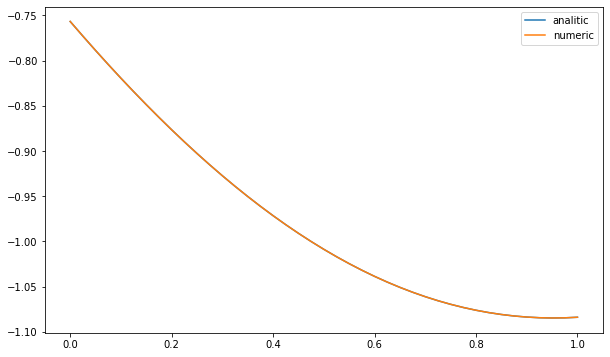

,x,Analitic,Numeric,Diff,Max Diff
0,0.000000E+00,-7.568025E-01,-7.568023E-01,2.037265E-07,2.603427E-07
1,2.500000E-02,-7.729835E-01,-7.729835E-01,1.278375E-08,2.603427E-07
2,5.000000E-02,-7.888378E-01,-7.888375E-01,2.115784E-07,2.603427E-07
3,7.500000E-02,-8.043554E-01,-8.043554E-01,1.327126E-08,2.603427E-07
4,1.000000E-01,-8.195271E-01,-8.195269E-01,2.189014E-07,2.603427E-07
5,1.250000E-01,-8.343436E-01,-8.343436E-01,1.372559E-08,2.603427E-07
6,1.500000E-01,-8.487962E-01,-8.487960E-01,2.256773E-07,2.603427E-07
7,1.750000E-01,-8.628763E-01,-8.628763E-01,1.414561E-08,2.603427E-07
8,2.000000E-01,-8.765758E-01,-8.765755E-01,2.318891E-07,2.603427E-07
9,2.250000E-01,-8.898868E-01,-8.898868E-01,1.453028E-08,2.603427E-07


In [382]:
result(40)

## Результат на последовательно удваиваемых сетках

In [383]:
result_double_grid(5)

,L,Max Diff
0,1.00000E+01,6.65556E-05
1,2.00000E+01,4.16547E-06
2,4.00000E+01,2.60407E-07
3,8.00000E+01,1.62757E-08
4,1.60000E+02,1.01725E-09
5,3.20000E+02,6.35814E-11


## 3-х мерный график поверхности

<ipython-input-357-d9d073539a93>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('surface.png', dpi=400, quality=100)


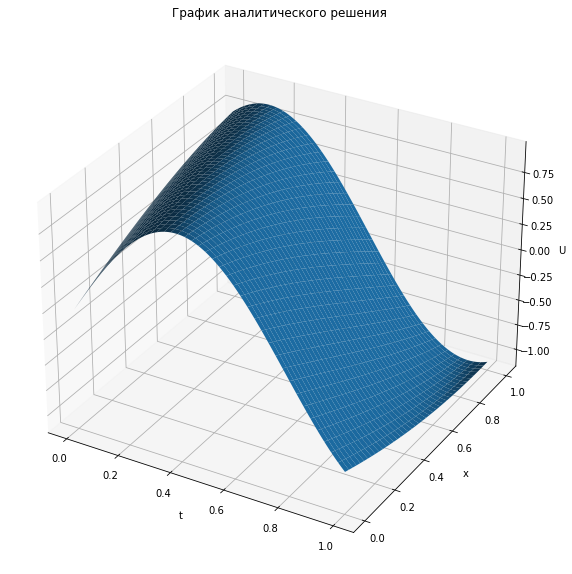

<ipython-input-357-d9d073539a93>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('surface_2.png', dpi=400, quality=100)


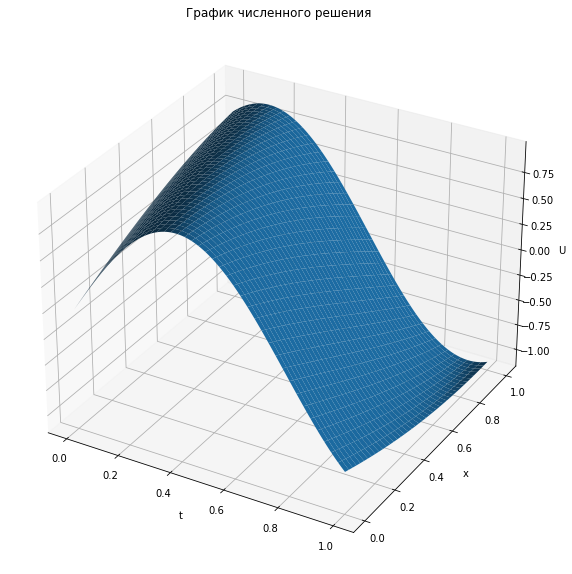

In [357]:
L = 40
K = 0.25
N = int(L/K)

x = np.arange(0,1+1/(10*L),1/L)
t = np.arange(0,1+1/(10*N),1/N)

t_a = []
for i in range(N+1):
    for j in range(N+1):
        t_a.append(t[i])
t_a = np.array(t_a)

x_a = np.array([])
for i in range(N+1):
    x_a = np.concatenate((x_a,x))    

   
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
xgrid, tgrid = np.meshgrid(x, t)
ax.plot_surface(tgrid, xgrid, anal(xgrid,tgrid))
ax.set_zlabel('U')
ax.set_ylabel('x')
ax.set_xlabel('t')
ax.set_title('График аналитического решения')
# plt.savefig('surface.png', dpi=400, quality=100)
plt.show()

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
xgrid, tgrid = np.meshgrid(x, t)
ax.plot_surface(tgrid, xgrid, U_num(N, L, x, t))
ax.set_zlabel('U')
ax.set_ylabel('x')
ax.set_xlabel('t')
ax.set_title('График численного решения')
# plt.savefig('surface_2.png', dpi=400, quality=100)
plt.show()

In [281]:
# L = 10
# k1 = 0.5
# h = 1/L
# N = int(abs(a/(2*k1*h)))
# tau = 1/N
# N

In [203]:
# condition = abs(2*h/a)
# def check():
#     if tau <= condition:
#         return 'Устойчиво'
#     else:
#         return 'Не устойчиво'
# check()